# Single Qbit H-gate

In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
simulator_q = Aer.get_backend('qasm_simulator')
simulator_s= Aer.get_backend('statevector_simulator')
simulator_u = Aer.get_backend('unitary_simulator')

In [3]:
"""
The StatevectorSimulator executes a single shot of a Qiskit QuantumCircuit
and returns the final quantum statevector of the simulation.
Note that if a circuit contains measure or reset the final statevector
will be a conditional statevector after simulating wave-function collapse
to the outcome of a measure or reset.
For the Bell-state circuit this means the final statevector will be either |0> or |1>.   .

"""

'\nThe StatevectorSimulator executes a single shot of a Qiskit QuantumCircuit\nand returns the final quantum statevector of the simulation.\nNote that if a circuit contains measure or reset the final statevector\nwill be a conditional statevector after simulating wave-function collapse\nto the outcome of a measure or reset.\nFor the Bell-state circuit this means the final statevector will be either |0> or |1>.   .\n\n'

In [4]:
circuit = QuantumCircuit(1, 1)

In [5]:
circuit.h(0)

In [6]:
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print (unitary)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


counts: {'1': 526, '0': 498}
outputstate: [0.+0.j 1.+0.j]


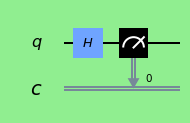

In [7]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.measure(0,0)
result2=execute(circuit,simulator_q).result()
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
counts = result2.get_counts(circuit)
print ("counts:",counts)
print ('outputstate:',outputstate)
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

In [8]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:',outputstate)

outputstate: [0.707+0.j 0.707+0.j]


# Big Summary (Single Qubit)
Always do unitary and statevector before circuit.measure().
Below everything is done in proper order!


### Single qbit with H gate

outputstate:
 [0.707+0.j 0.707+0.j]
UnitaryMatrix:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]
counts:
 {'1': 505, '0': 519}


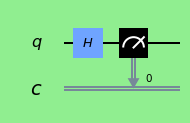

In [9]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure(0,0)
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)


$
Initial state:|0> \\  
After: H= \frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>\\  
            H = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  & 1 \\
    1 & -1
\end{bmatrix}\\ |1 > = \begin{bmatrix}
    1  \\
    0
\end{bmatrix} ; |0> = \begin{bmatrix}
    0\\
    1
\end{bmatrix}$
            

### Single Qbit with Pauli-X and H gate!

In [10]:
# In this case it is a matrix multiplication of H X Pauli-X!


Manual Approch to determine Unitary Matrix: \
$ 
H \otimes PauliX  =  \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}\begin{bmatrix}
    0  &   1 \\
    1  &   0
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
-1 & 1
\end{bmatrix}$

outputstate:
 [ 0.707+0.j -0.707+0.j]
UnitaryMatrix:
 [[ 0.70710678+0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j]]
counts:
 {'1': 532, '0': 492}


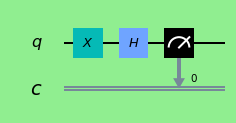

In [12]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
circuit.h(0)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure(0,0)
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

### Two qubits with H-gate on first qubit

In [13]:
#In this case first operator is H and second is Identity Matrix.
#The product of these two gives a transformation matrix as follows:


Manual Approch to determine Unitary Matrix: \
$I \otimes H  =  \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 & 0 & 0\\
1 & -1 & 0 & 0\\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{bmatrix}$\\

If the H-gate were on 2nd qubit, It will be:
$H \otimes I  = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1  &   1 \\
    1  &  -1
\end{bmatrix} \otimes \begin{bmatrix}
    1  &   0 \\
    0  &   1
\end{bmatrix}  = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{bmatrix}$

outputstate:
 [0.707+0.j 0.707+0.j 0.   +0.j 0.   +0.j]
UnitaryMatrix:
 [[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]
counts:
 {'01': 496, '00': 528}


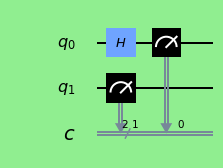

In [14]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

### Two qbits with single H-Gate for each bit

$H_1 \otimes H_1 = \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}$

outputstate:
 [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
UnitaryMatrix:
 [[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]]
counts:
 {'01': 241, '10': 267, '00': 231, '11': 285}


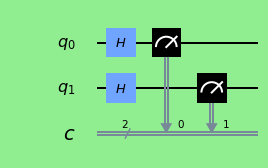

In [15]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.h(1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

Basis Vectors for 2 qubits are as follows:\
$
|00> = \begin{bmatrix}
    1  \\
    0 \\
    0\\
    0
\end{bmatrix} ; |01> = \begin{bmatrix}
    0\\
    1\\
    0\\
    0
\end{bmatrix} ; |10> = \begin{bmatrix}
    0  \\
    0 \\
    1\\
    0
\end{bmatrix} ; |11> = \begin{bmatrix}
    0\\
    0\\
    0\\
    1
\end{bmatrix}$

This is a tensor product of two Hadamard transform. Lets apply it to |00> 
$(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) = \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$
$H_2|00>  = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}\begin{bmatrix} 
    1  \\
    0 \\
    0\\
    0
    \end{bmatrix}
    = \begin{bmatrix}
    \frac{1}{2} \\
    \frac{1}{2} \\
    \frac{1}{2}\\
    \frac{1}{2}
\end{bmatrix}$\\
$
=  \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$

### Three Qubits with H gate on each

outputstate:
 [0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j 0.354+0.j
 0.354+0.j]
UnitaryMatrix:
 [[ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
   0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j
   0.35355339+0.j -0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j  0.35355339+0.j  0.35355339+0.j
  -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j -0.35355339+0.j]
 [ 0.35355339+0.j -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j  0.35355339+0.j -0.35355339+0.j  0.35355339+0.j]
 [ 0.35355339+0.j  0.35355339+0.j -0.35355339+0.j -0.35355339+0.j
  -0.35355339+0.j -0.35

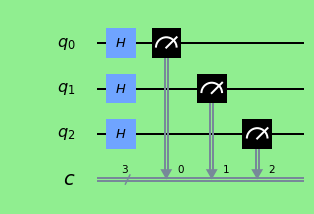

In [17]:
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.h(1)
circuit.h(2)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1,2],[0,1,2])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)


$
H_3|000> = \frac{1}{2\sqrt{2}}(|000>  + |001> + |010> + |011>  +  |100> +  |101> + |110> +|111>)$  


In Matrix form the multiplication looks like this:  
$
H_3|000> = \frac{1}{2\sqrt{2}} \begin{bmatrix}
    1  &   1  &  1  &   1  &  1  &   1  &  1  &   1 \\
    1  &  -1  &  1  &  -1  &  1  &  -1  &  1  &  -1 \\
    1  &   1  & -1  &  -1  &  1  &   1  & -1  &  -1 \\
    1  &  -1  & -1  &   1  &  1  &  -1  & -1  &   1 \\
    1  &   1  &  1  &   1  &  -1  & -1  &  -1  & -1 \\
    1  &  -1  &  1  &  -1  &  -1  &  1  &  -1  &  1 \\
    1  &   1  & -1  &  -1  &  -1  &   -1  &  1  &   1 \\
    1  &  -1  & -1  &   1  &  -1  &    1  &  1  &  -1 \\
\end{bmatrix} \begin{bmatrix} 
    1  \\
    0 \\
    0\\
    0\\
    0\\
    0\\
    0\\
    0
    \end{bmatrix}
    = \begin{bmatrix}
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}} \\
    \frac{1}{2\sqrt{2}}\\
    \frac{1}{2\sqrt{2}}
\end{bmatrix}
$
$
= \frac{1}{2\sqrt{2}}(|000>  + |001> + |010> + |011>  +  |100> +  |101> + |110> +|111>)
$
